<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Customer_Segmentation/PCA_Final_Customer_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
fcd = pd.read_csv('Final_Customer_Data.csv')

In [ ]:
fcd.shape

(8950, 11)

In [ ]:
fcd.tail(10)

,BALANCE,BALANCE_FREQUENCY,INSTALLMENTS_PURCHASES,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Total_Purchase,Avg_Purchase_Frequency,Total_Trx
8940,130.838554,1.000000,591.24,0.000000,1000.0,475.523262,82.771320,1.00,591.240000,0.500000,6
8941,5967.475270,0.833333,214.55,0.666667,9000.0,966.202912,861.949906,0.00,8769.959326,0.416666,18
8942,40.829749,1.000000,113.28,0.000000,1000.0,94.488828,86.283101,0.25,113.280000,0.500000,6
8943,5.871712,0.500000,0.00,0.000000,500.0,58.644883,43.473717,0.00,20.900000,0.166667,1
8944,193.571722,0.833333,0.00,0.000000,4000.0,0.000000,169.772968,0.00,1012.730000,0.333333,2
8945,28.493517,1.000000,291.12,0.000000,1000.0,325.594462,48.886365,0.50,291.120000,0.500000,6
8946,19.183215,1.000000,300.00,0.000000,1000.0,275.861322,156.060050,0.00,300.000000,0.500000,6
8947,23.398673,0.833333,144.40,0.000000,1000.0,81.270775,82.418369,0.25,144.400000,0.416666,5
8948,13.457564,0.833333,0.00,0.166667,500.0,52.549959,55.755628,0.25,36.558778,0.000000,2
8949,372.708075,0.666667,0.00,0.333333,1200.0,63.165404,88.288956,0.00,1220.290008,0.666667,25


In [ ]:
#reduce components with PCA (reduce dimenson) n_components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_fcd = pca.fit_transform(fcd)

In [ ]:
#verify reducing component(OLD dataset)
fcd.shape


(8950, 11)

In [ ]:
#new data set with PCA
new_fcd.shape

(8950, 2)

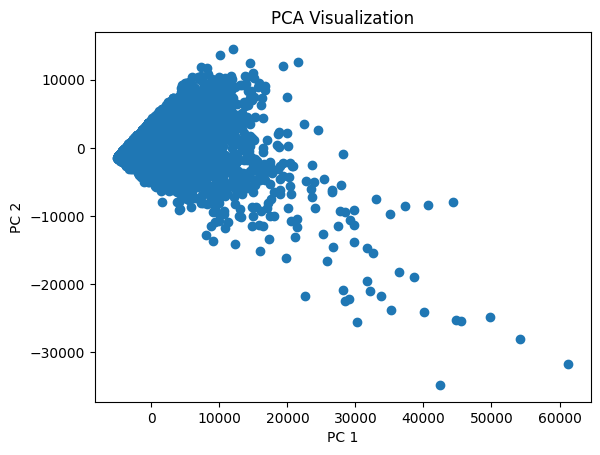

In [ ]:
#visualize dataset with PCA
import matplotlib.pyplot as plt
plt.scatter(new_fcd[:, 0], new_fcd[:, 1], )
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Visualization')
plt.show()

In [ ]:
#preprosess data using sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
new_data = sc.fit_transform(fcd)

In [ ]:
#Check PCA with feature accuracy and model speed
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [ ]:
#train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data_pca, fcd, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(7160, 10)

In [ ]:
y_train.shape

(7160, 11)

##Final PCA


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

#Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(fcd)

#Apply PCA
pca = PCA()
pca_result = pca.fit_transform(standardized_data)

#Analyze variance
explained_variance_ratio = pca.explained_variance_ratio_  # Variance explained by each component
cumulative_variance_ratio = explained_variance_ratio.cumsum()  # Cumulative variance

# Print cumulative variance to decide the number of components to keep
print("Cumulative Variance Explained:", cumulative_variance_ratio)

#Reduce to desired number of components (retain 95% variance)
n_components = sum(cumulative_variance_ratio <= 0.95)
pca_reduced = PCA(n_components=n_components)
reduced_data = pca_reduced.fit_transform(standardized_data)

# Convert the reduced data back to a DataFrame
pca_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(n_components)])

from google.colab import files

# Save the final dataset to a CSV file
pca_df.to_csv('PCA_Data.csv', index=False)

# Download the CSV file
files.download('PCA_Data.csv')



Cumulative Variance Explained: [0.32572946 0.5139746  0.62053713 0.70600366 0.77822227 0.84386028
 0.89305076 0.93800454 0.96212268 0.98409902 1.        ]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>